<a href="https://colab.research.google.com/github/AmritaNeogi/Breast_Cancer_Prediction/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing the Dependencies**

In [3]:
import numpy as np
import pandas as pd
import sklearn.datasets

# for modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# for Neural Network
import tensorflow as tf
from tensorflow import keras

# for EDA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Set the filter to ignore all warnings
warnings.filterwarnings("ignore")

**Load Data**

In [4]:
# loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [5]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

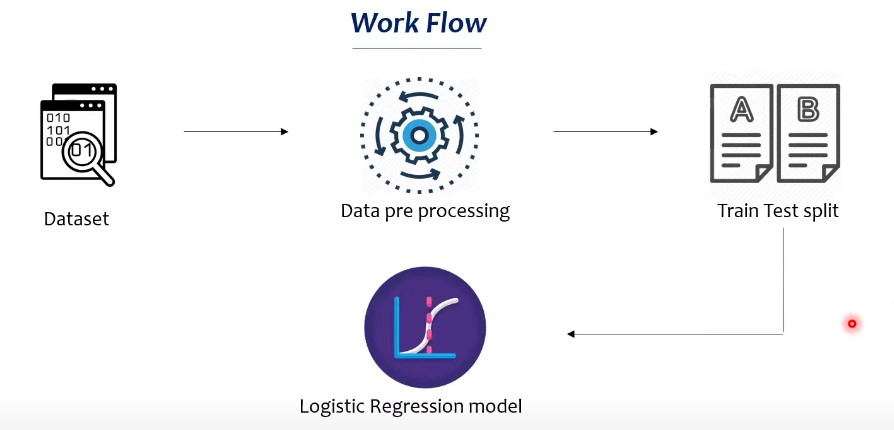

We, will use Logistic Regression since it is the best type of model for binary classification.

# **DATA PREPROCESSING**

In [6]:
# loading the data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [6]:
# print the first 5 rows of the dataframe
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [8]:
# print last 5 rows of the dataframe
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
# number of rows and columns in the dataset
data_frame.shape

(569, 31)

In [10]:
# getting some information about the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
# checking for missing values
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [12]:
# statistical measures about the data
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


25% is 25 percentile, which means 25% of data have mean radius less that 11.7 and so on.

# **Exploratory Data Analysis (EDA)**

Exploratory Data Analysis is all about analyzing the dataset and summarizing the key insights and characteristics of the data.

EDA checklist:

Understanding the dataset, and its shape <br>
Checking the data type of each columns <br>
Categorical & Numerical columns<br>
Checking for missing values<br>
Descriptive summary of the dataset<br>
Groupby for classification problems<br>

In [30]:
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [31]:
# removing the unnamed column
breast_cancer_data.drop(columns='Unnamed: 32', axis = 1, inplace=True)

# removing the id column
breast_cancer_data.drop(columns='id', axis=1, inplace=True)

In [32]:
breast_cancer_data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


Diagnosis column is a CATEGORICAL columnm whereas remIning are continuous values

In [33]:
# checking for missing values
breast_cancer_data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

The dataset has no missing values.

Statistical summary of the data - Descriptive Statistics

In [34]:
breast_cancer_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Mean Value > Median value ----> Right Skewed Data

Check whether the mean and median (50th percentile) are closer to each other


Checking the distribution of target Variable

In [35]:
breast_cancer_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

There is a slight imbalance in the dataset.

In [36]:
# encoding the target column
label_encode = LabelEncoder()

labels = label_encode.fit_transform(breast_cancer_data['diagnosis'])
# Reverse the encoding to avoid the confusion
# 0 represents M and 1 represents B
reversed_labels = 1 - labels

breast_cancer_data['target'] = reversed_labels

breast_cancer_data.drop(columns='diagnosis', axis=1, inplace=True)

In [37]:
breast_cancer_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [38]:
breast_cancer_data['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

**Inference**: We can clearly see that for most of the features, the mean values are higher for Malignant(0) cases and lower for Benign(1) cases

**Summary from EDA:**

No missing Values. <br>
All are continuous numerical values except for Target column <br>
Mean is slightly more than the median for most of the features. So it is right skewed. <br>
Slight imbalance in the dataset (Benign(1) cases are more than Malignant(0) cases.<br>
Mean of most features are clearly larger for Malignant cases compared to the benign cases (Groupby). <br>

# **DATA VISUALIZATION**

<Axes: xlabel='target', ylabel='count'>

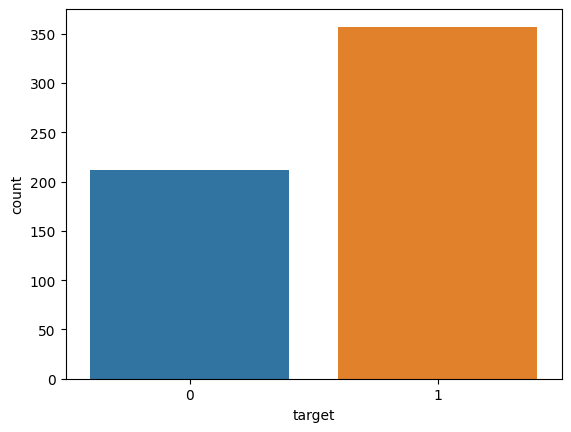

In [39]:
# countplot for the target column for checkin gthe distribution of target
sns.countplot(x='target', data = breast_cancer_data)

Distribution for all features (columns)

In [40]:
# get all the column names of the dataframe
for column in breast_cancer_data:
  print(column)

radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst
target


Univariate Analysis - Distribution Plot

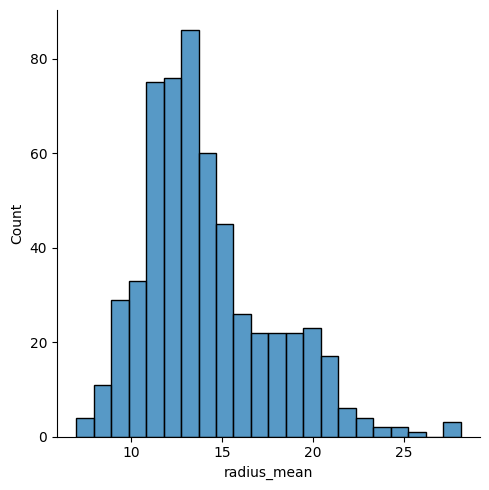

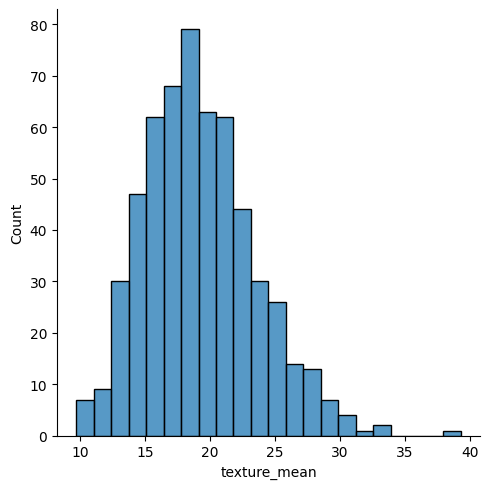

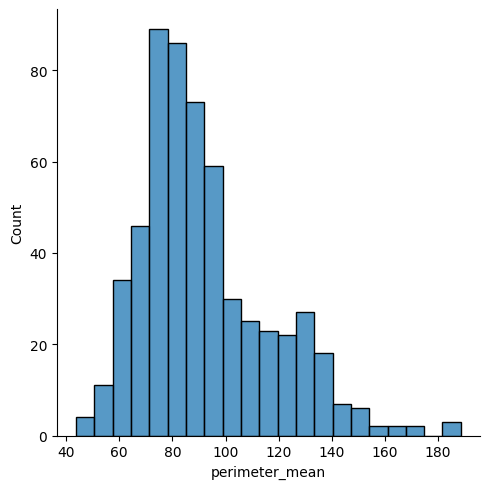

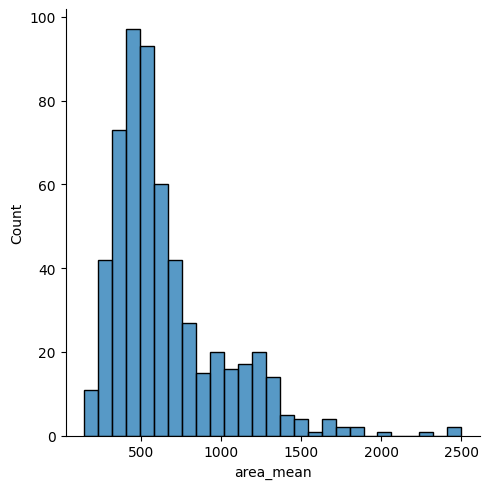

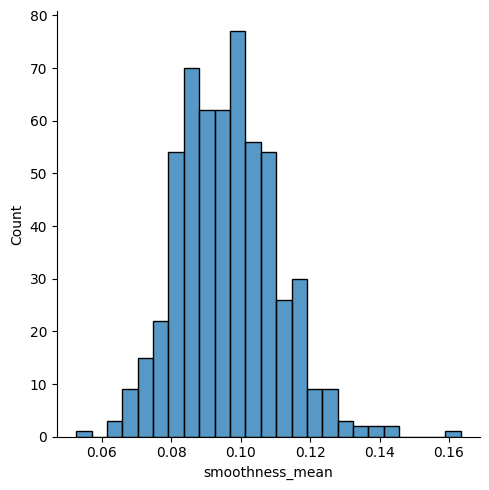

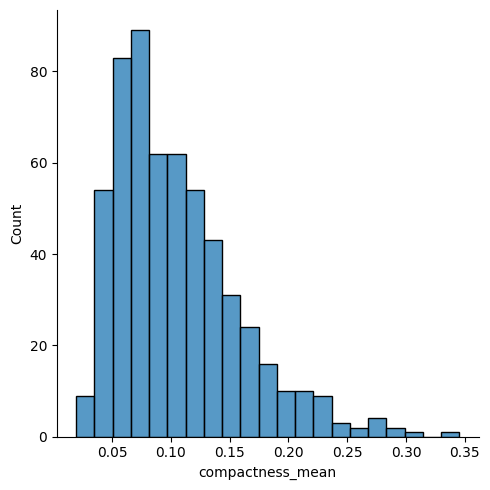

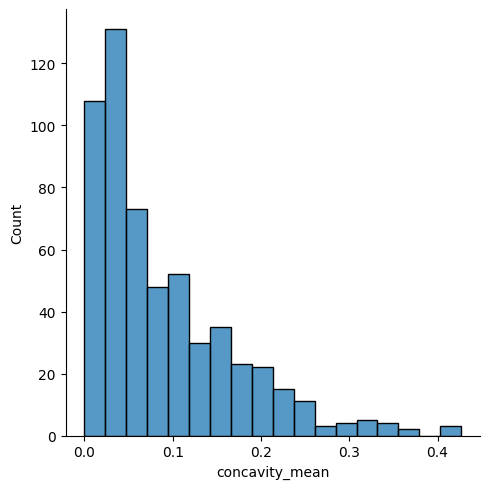

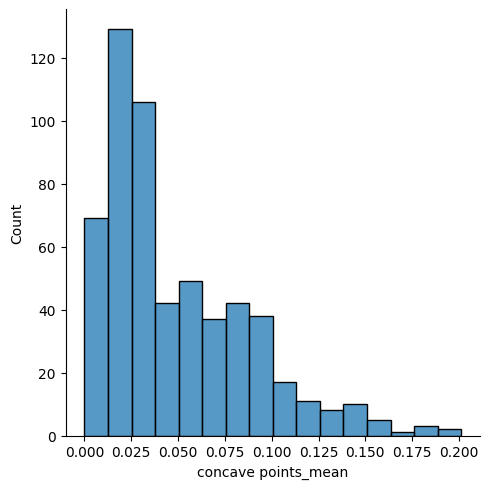

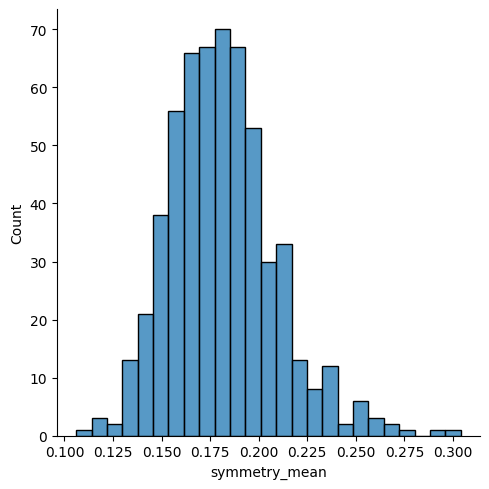

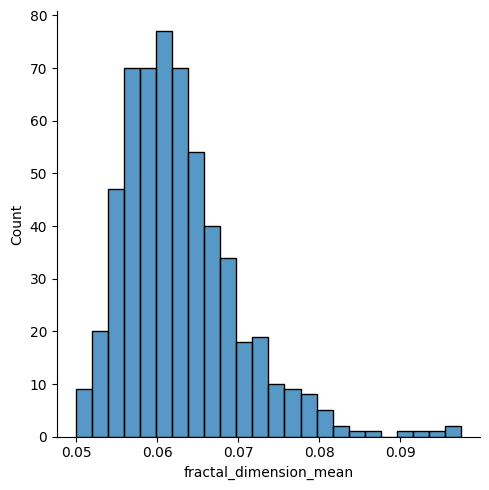

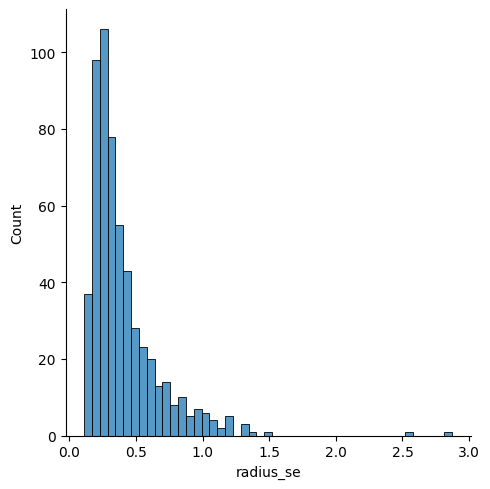

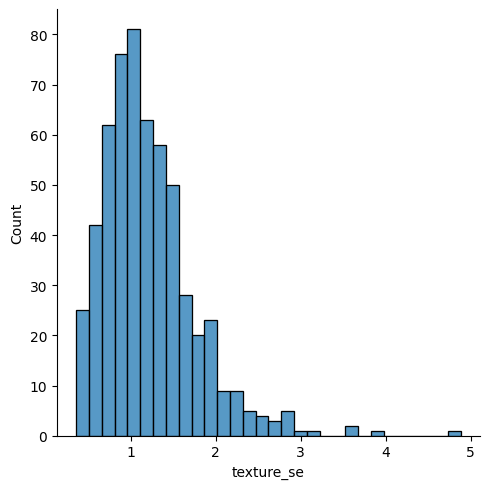

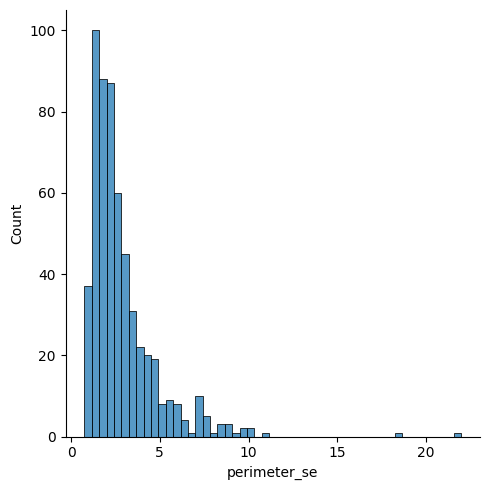

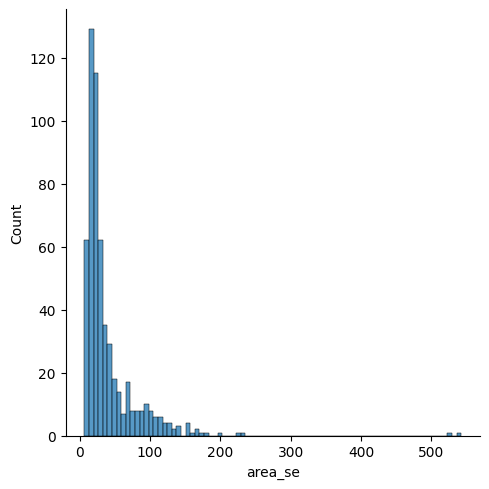

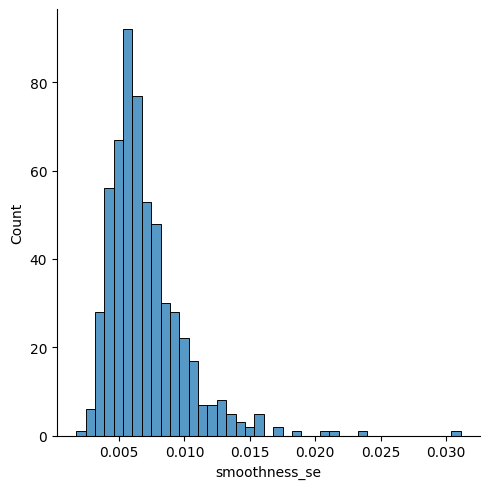

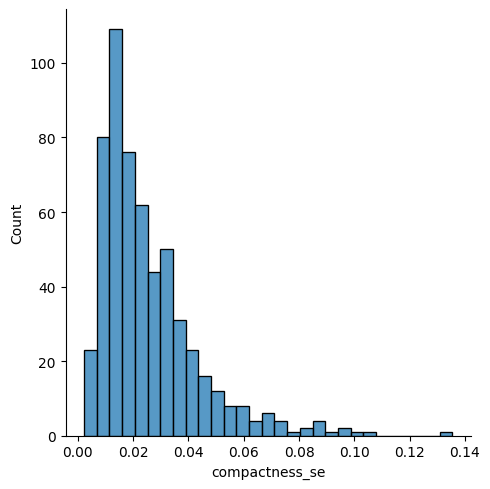

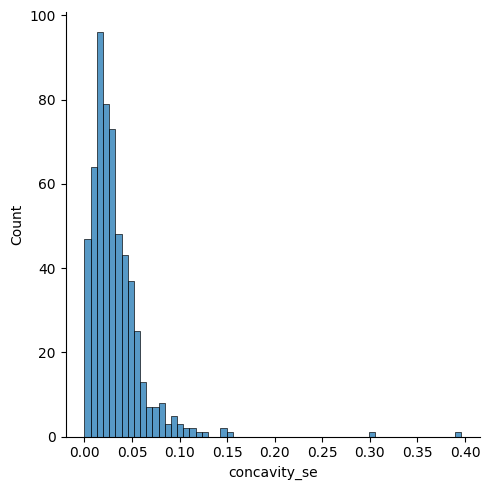

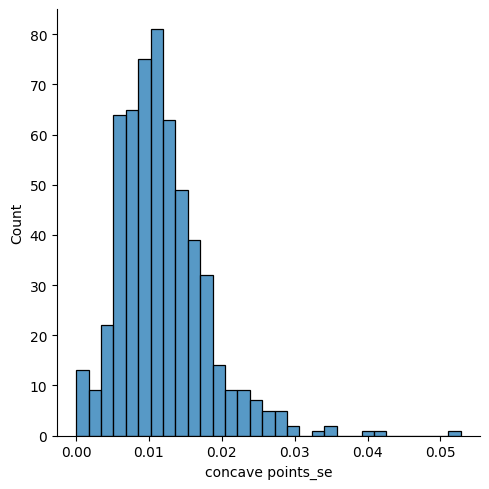

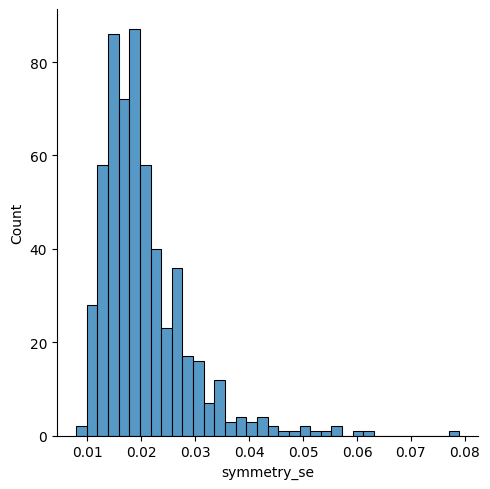

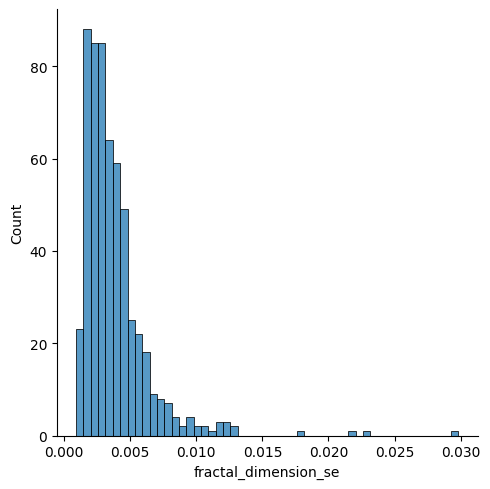

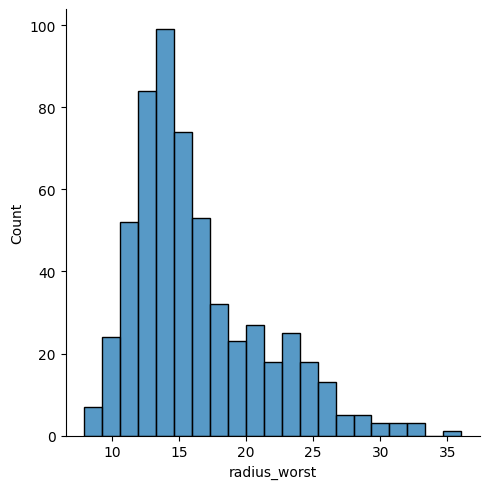

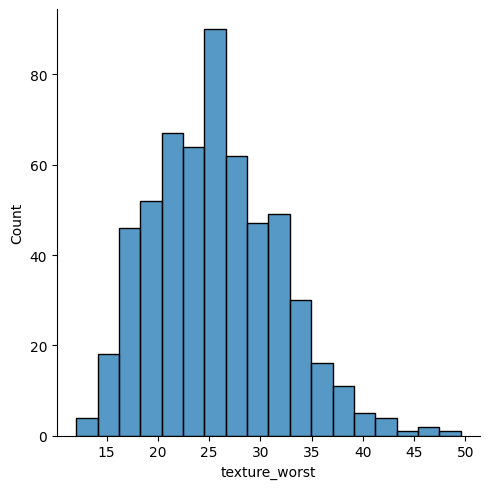

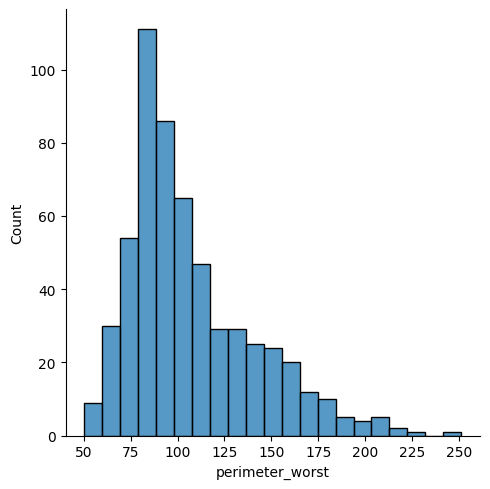

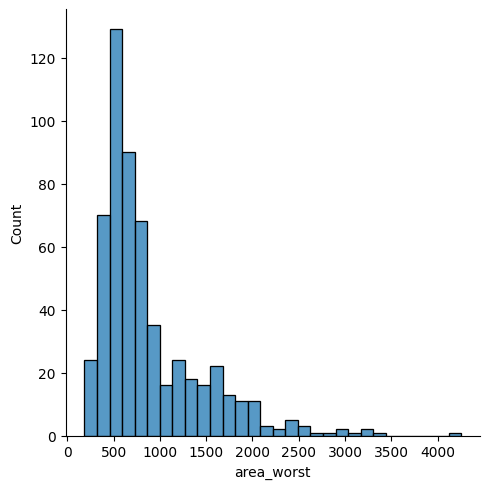

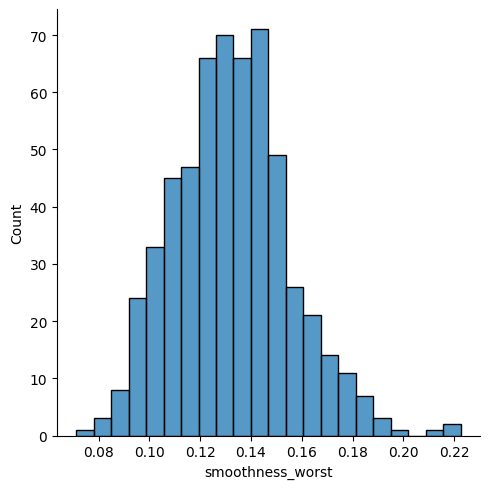

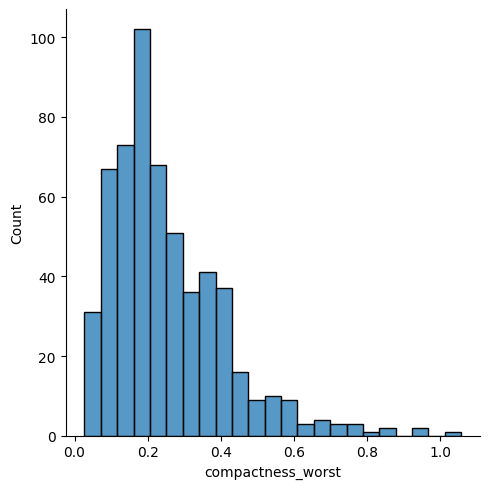

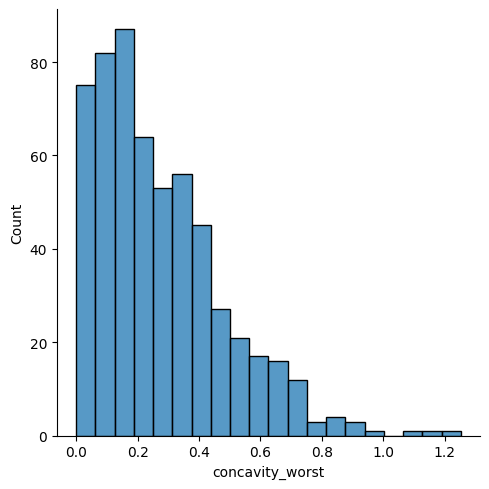

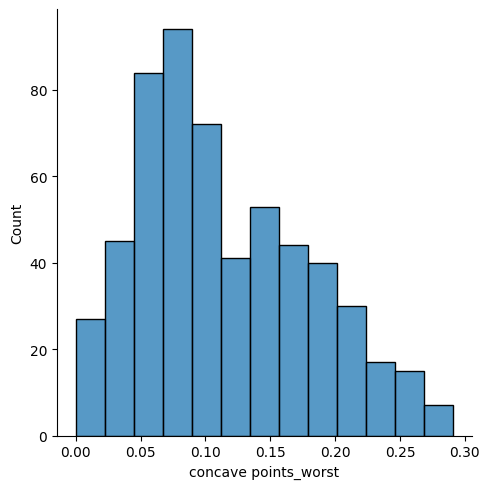

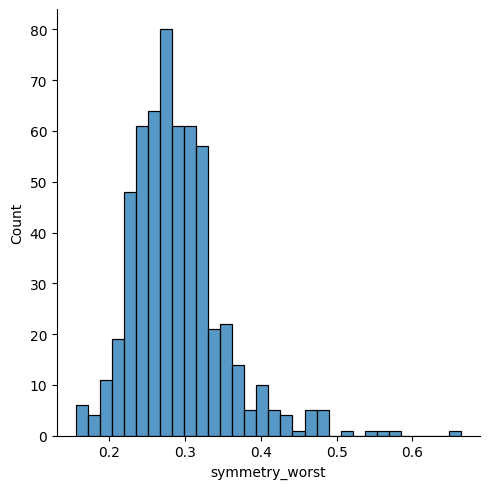

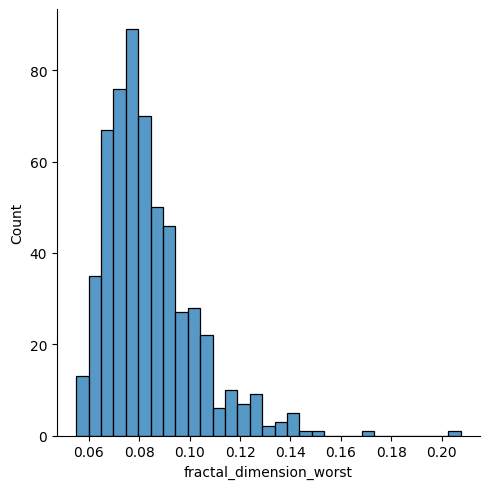

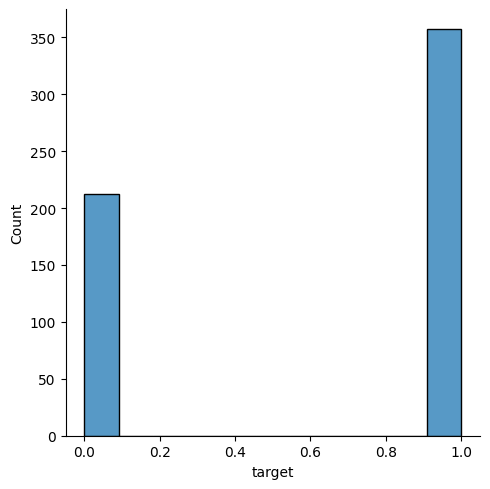

In [41]:
# creating a for loop to get the distribution plot for all columns
for column in breast_cancer_data:
  sns.displot(x=column, data=breast_cancer_data)

<Axes: ylabel='Density'>

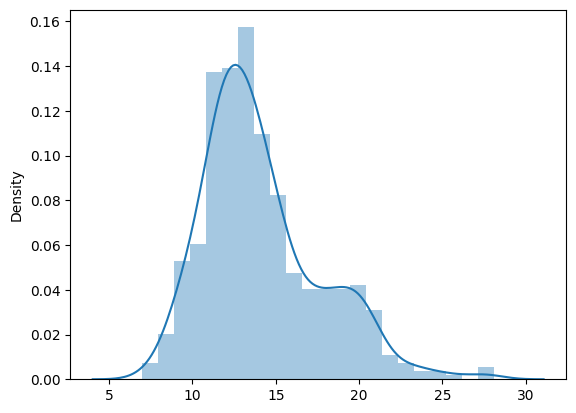

In [122]:
sns.distplot(x= breast_cancer_data.radius_mean)

Inference about distribution: Most of the features are right skewed

Bivariate Analyis:

i. Pair Plot- Pair plot takes a lot of time if the number of features is more. So we are going to take a random sample of the original dataset to make the pairplot (Not plotting here) <br>
ii. Scatter plot <br>
iii. Correlation Analysis using Heat Map <br>


Scatter Plot for  first 2 features

In [46]:
first_column = breast_cancer_data.iloc[:,0] # first column of the dataframe as a series

second_column = breast_cancer_data.iloc[:,1] # second column of the dataframe as a series


print(first_column)
print('----------------------------------------------')
print(second_column)

0      17.99
1      20.57
2      19.69
3      11.42
4      20.29
       ...  
564    21.56
565    20.13
566    16.60
567    20.60
568     7.76
Name: radius_mean, Length: 569, dtype: float64
----------------------------------------------
0      10.38
1      17.77
2      21.25
3      20.38
4      14.34
       ...  
564    22.39
565    28.25
566    28.08
567    29.33
568    24.54
Name: texture_mean, Length: 569, dtype: float64


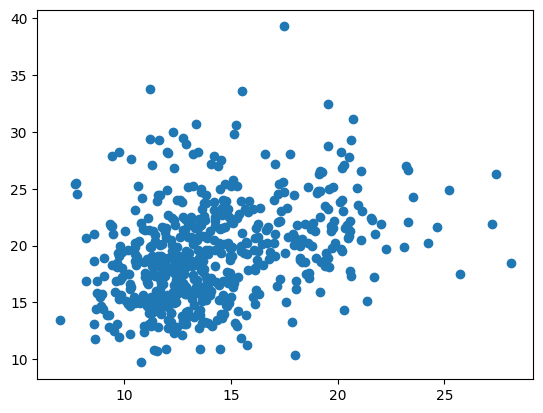

In [47]:
# let's plot a scatter plot for 1st feature vs second feature
plt.scatter(x=first_column, y=second_column)

**Outliers Detection**

Box plot for visualizing the outliers in the dataset

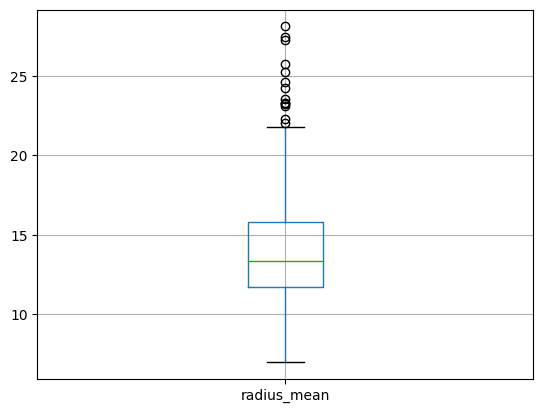

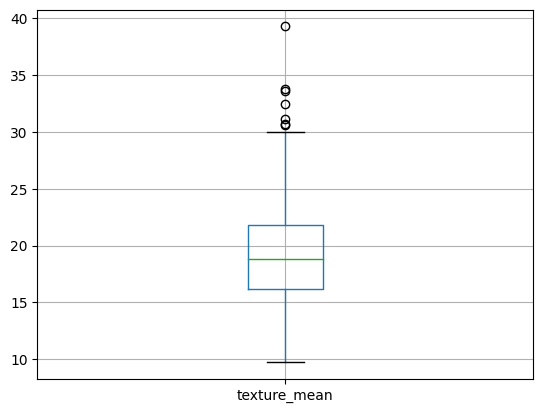

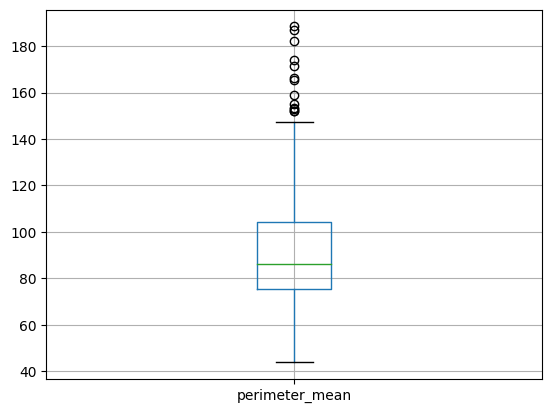

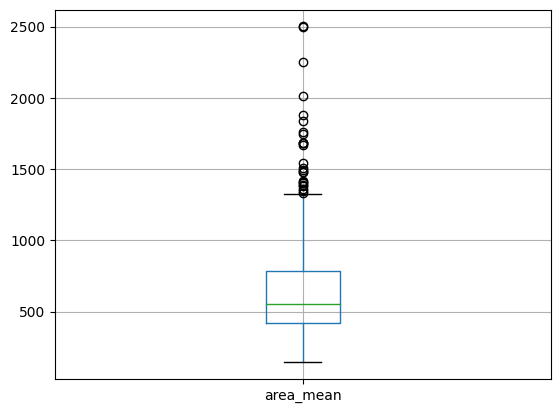

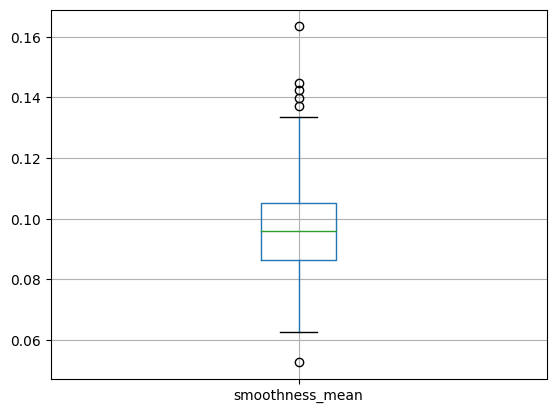

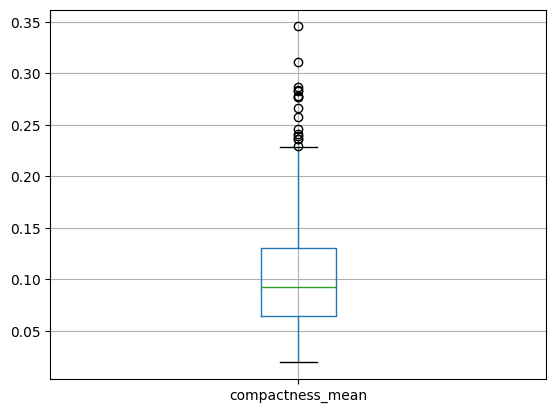

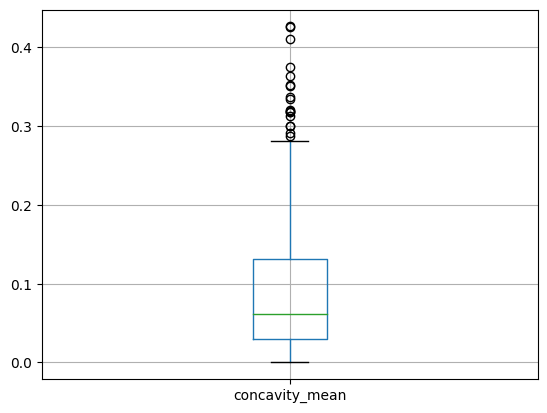

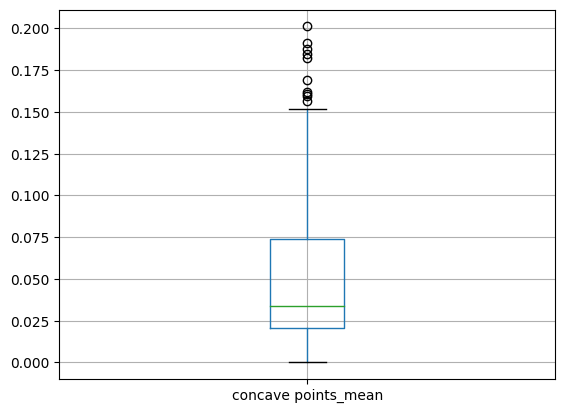

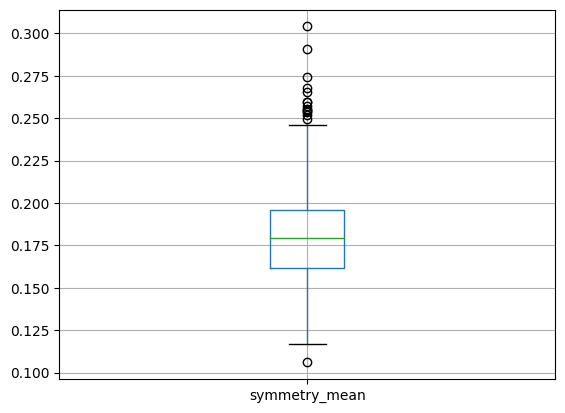

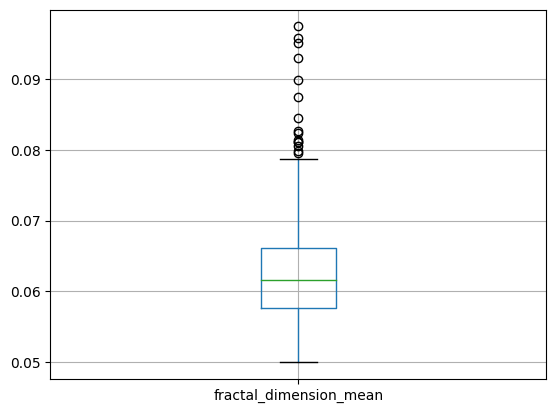

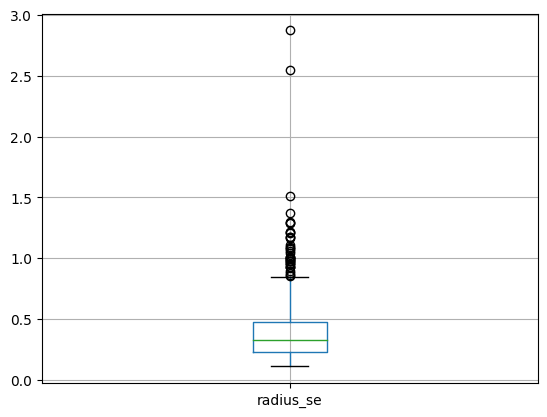

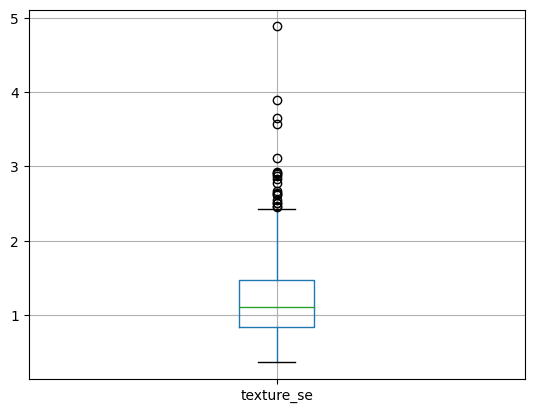

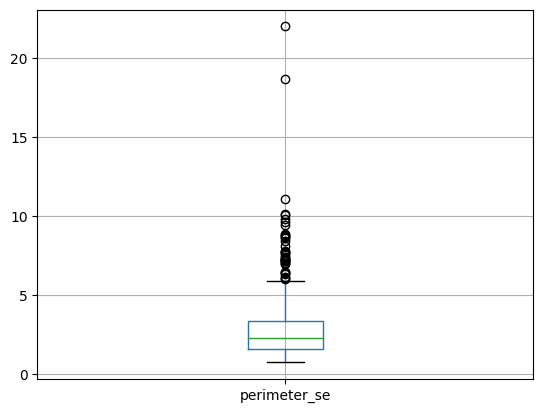

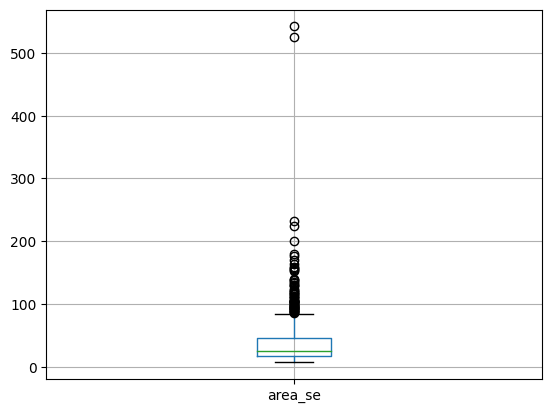

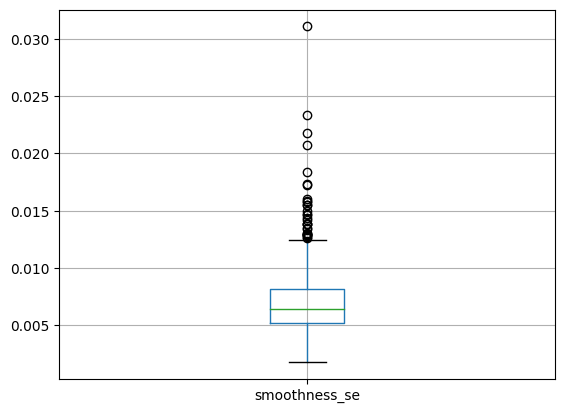

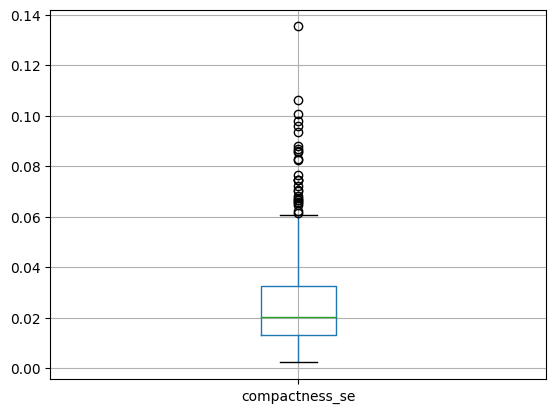

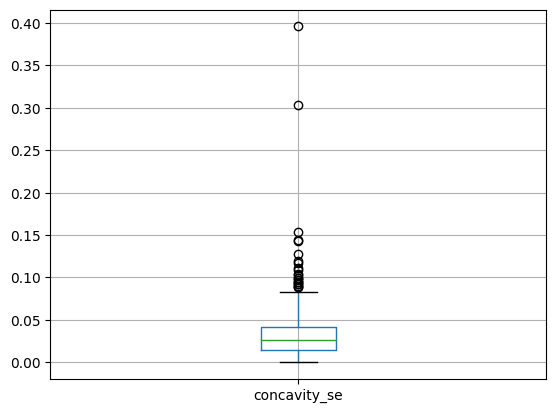

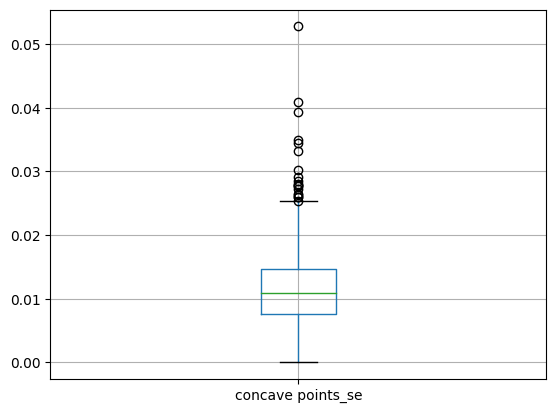

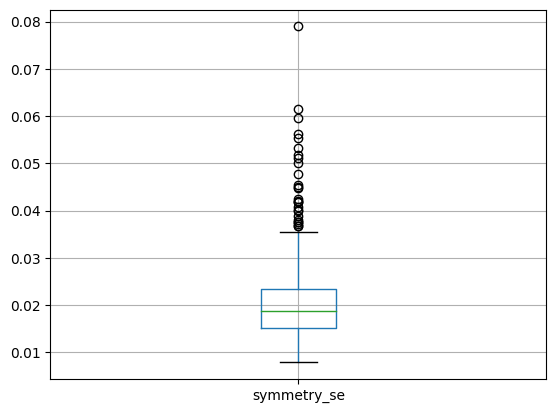

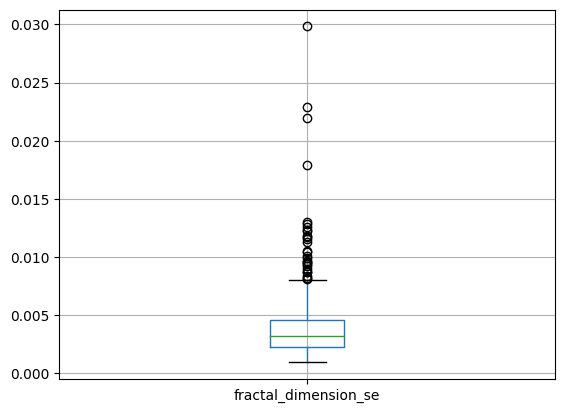

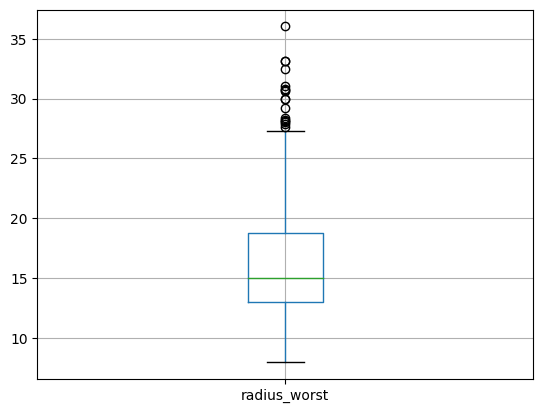

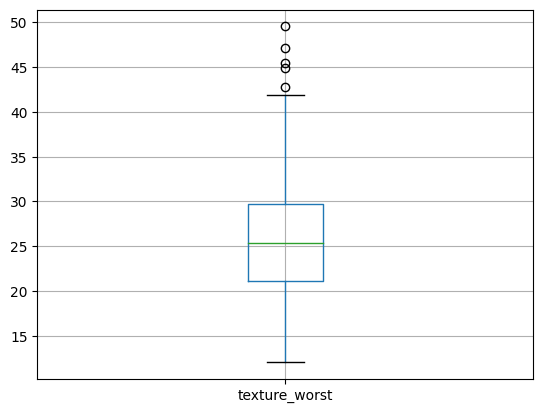

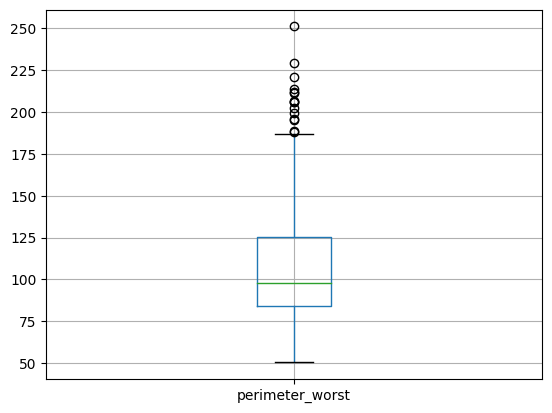

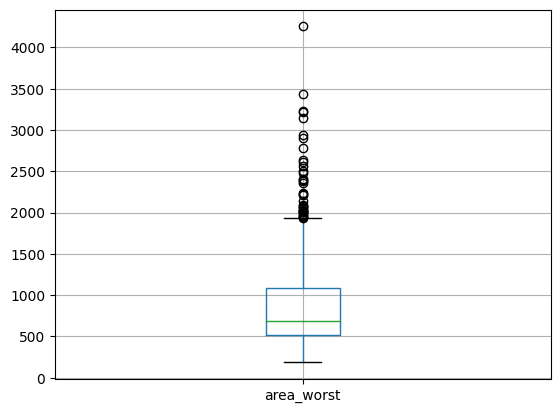

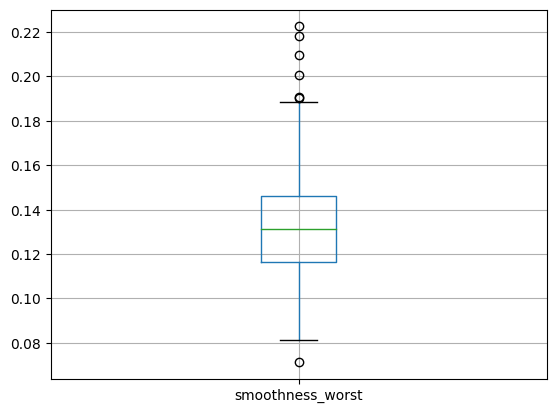

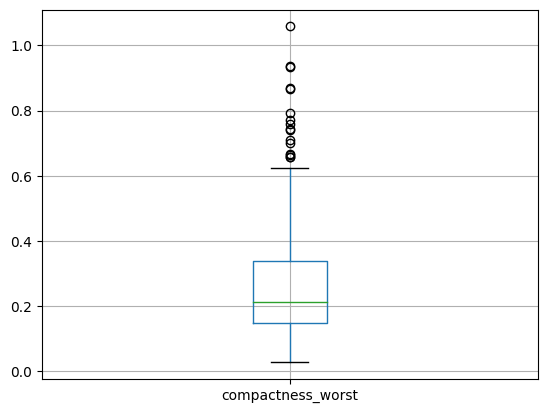

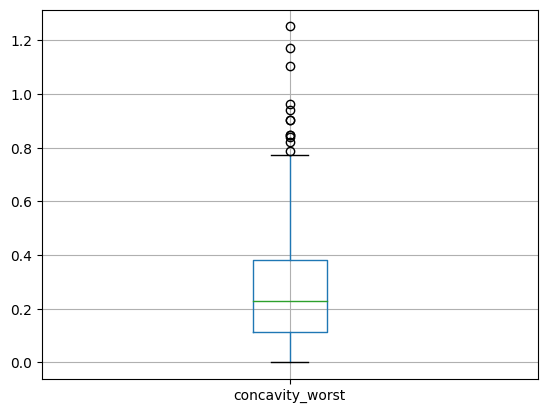

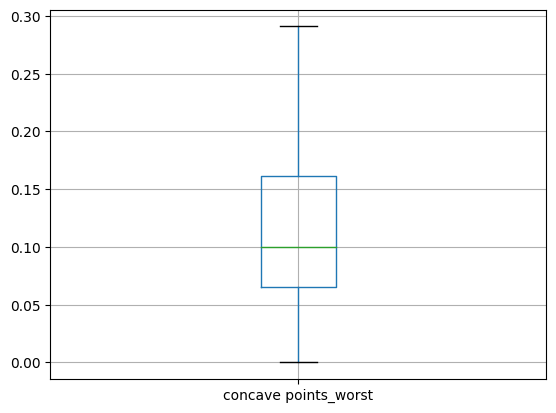

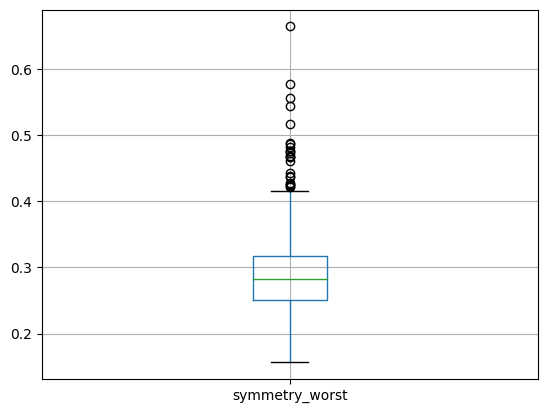

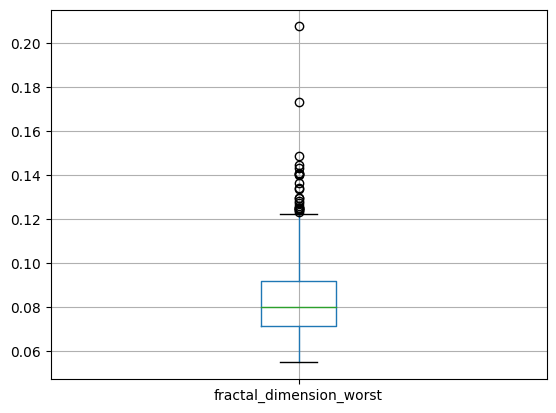

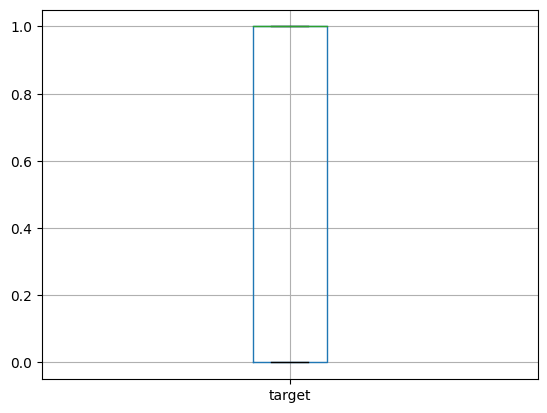

In [48]:
for column in breast_cancer_data:
    plt.figure()
    breast_cancer_data.boxplot([column])

Most of the skewed features have Outliers

**Correlation Matrix**

In [49]:
correlation_matrix = breast_cancer_data.corr()

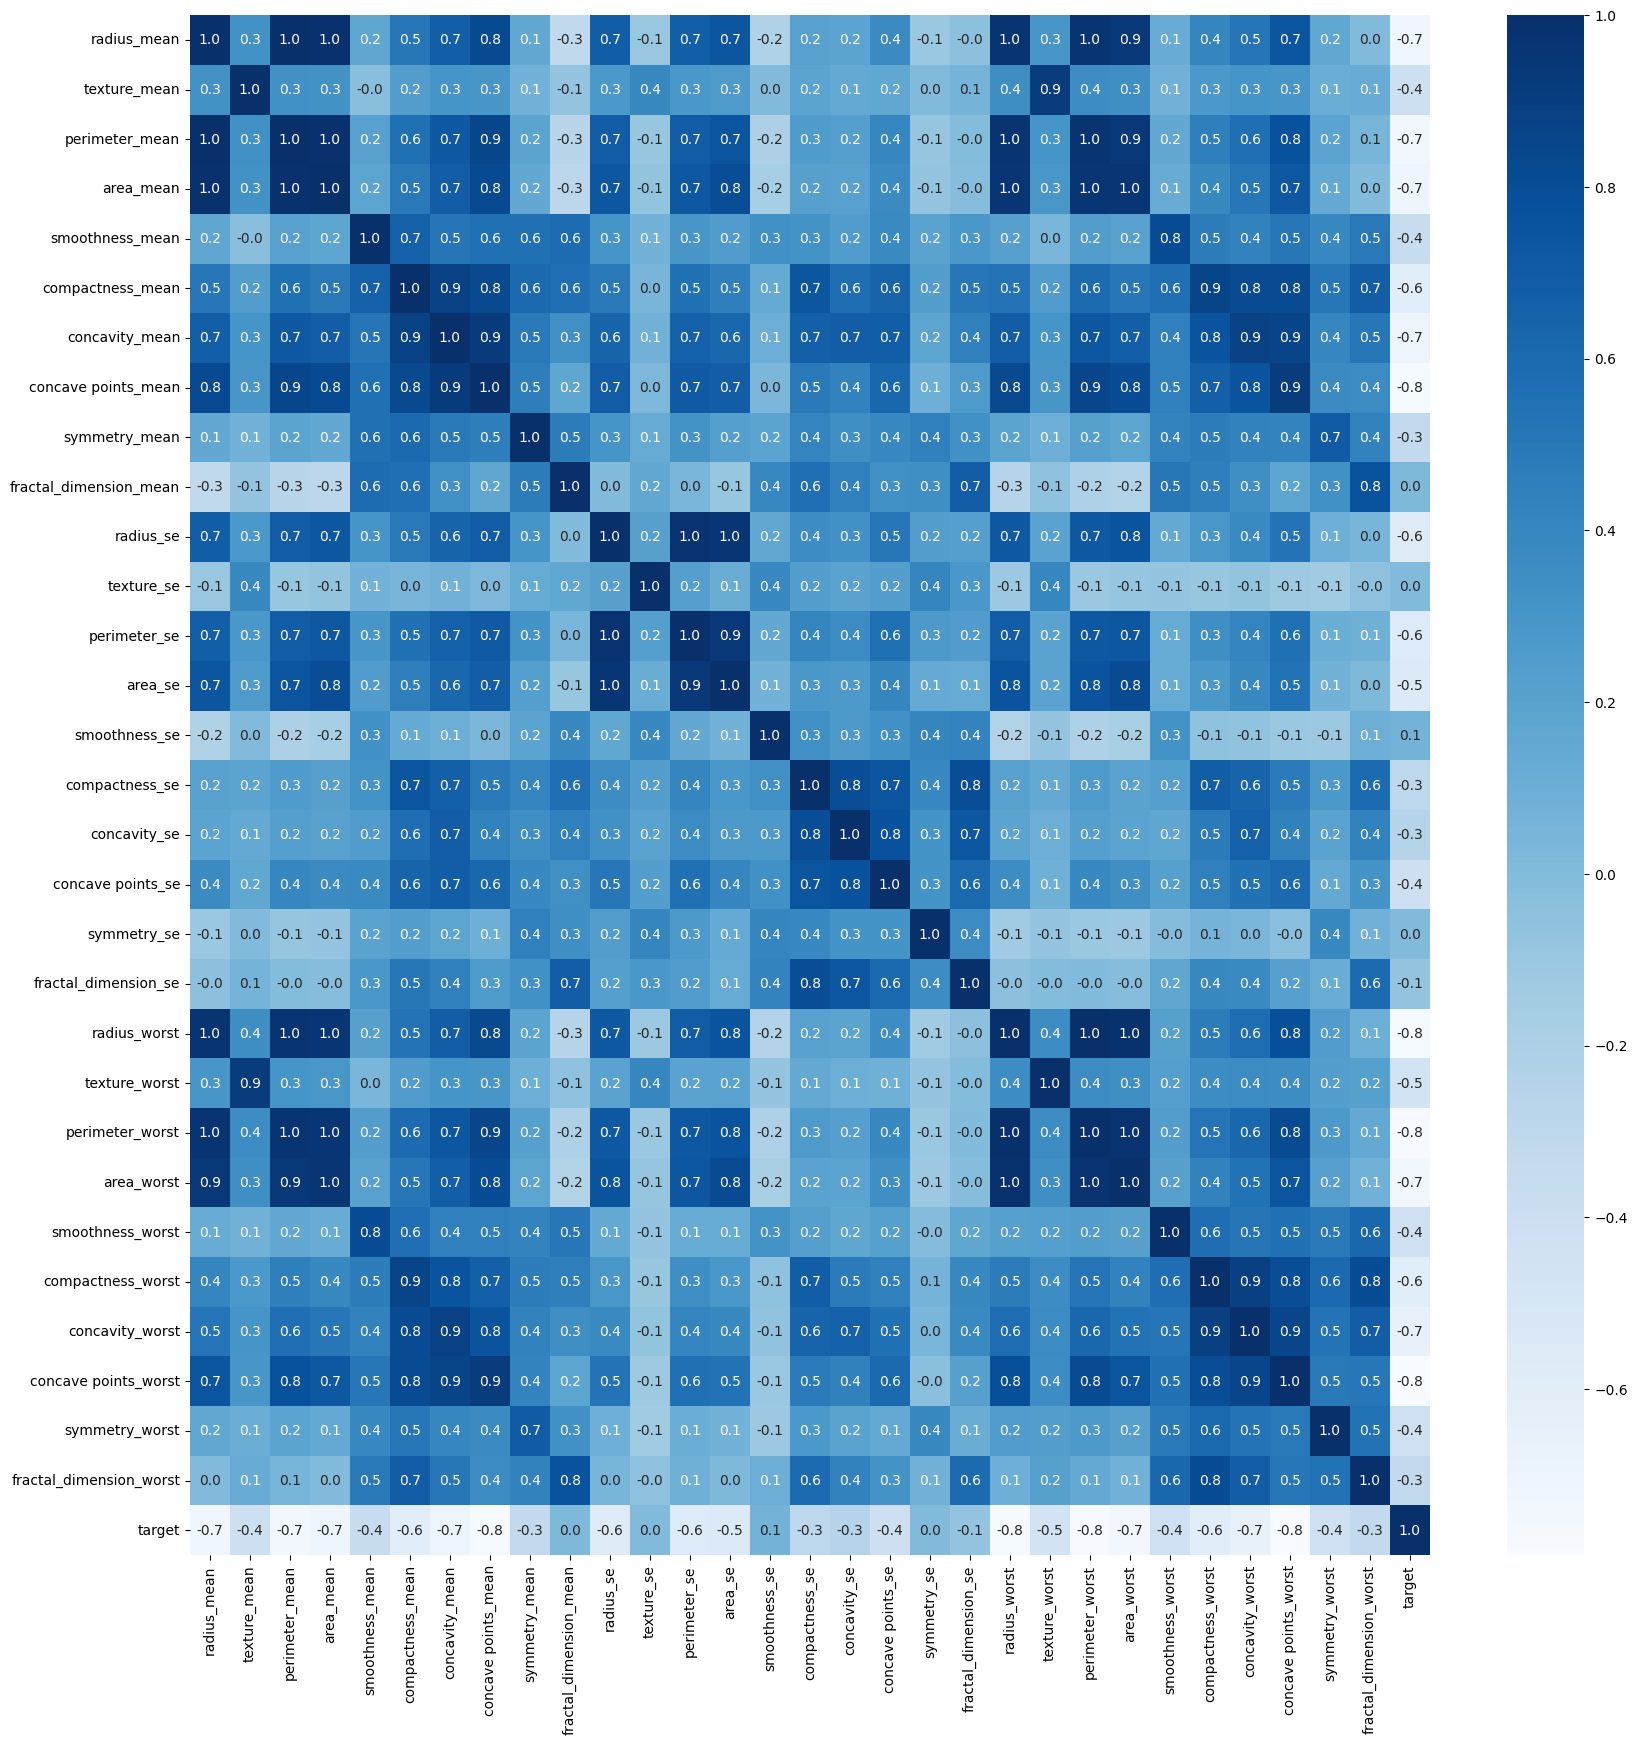

In [50]:
# constructing a heat map to visualize the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')
plt.savefig('Correlation Heat map')

**Multicollinearity problem:**

Multicollinearity exists when an independent variable is highly correlated with one or more independent variables <br>

We can remove the features if they have high +ve or -ve correlation between them.

**Inference from EDA & Data Visualization:**

i. No missing Values <br>
ii. All are continuous numerical values except for Target column <br>
iii. Mean is slightly more than the median for most of the features. So it is right skewed.
iv. Slight imbalance in the dataset (Benign(1) cases are more than Malignant(0) cases) <br>
v. Mean of most features are clearly larger for Malignant cases compared to the benign cases (Groupby) <br>
vi. Most of the features have Outliers <br>
vii. Correlation Matrix reveal that most of the features are highly correlated. So we can remove certain features during Feature Selection <br>

In [9]:
# checking the distribution of Target Variables
data_frame['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

1 --> Benign

0 --> Malignant (Cancerous)

In [10]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


**Separating the features and target**

In [11]:
X = data_frame.drop(columns='label', axis=1) # when dropping column axis =1, dropping row, axis=0
Y = data_frame['label']

In [12]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [17]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


**Splitting the data into training data & Testing data**

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


# **Model Training**

# Logistic Regression

In [15]:
model = LogisticRegression()

In [16]:
# training the Logistic Regression model using Training data

model.fit(X_train, Y_train)

LogisticRegression()

**Model Evaluation**

Accuracy Score

In [17]:
# accuracy on training data
train_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, train_pred)

In [18]:
print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  0.9472527472527472


In [19]:
# accuracy on test data
test_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, test_pred)

In [20]:
print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.9298245614035088


# **Building a Predictive System**

In [21]:
# loading the breast cancer dataset from csv file to pandas data frame
breast_cancer_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')

In [22]:
breast_cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [23]:
# Select the 3rd row (index 2) and exclude columns 'id', 'diagnosis', and 'Unnamed: 32'
#input_row = breast_cancer_data.iloc[1][breast_cancer_data.columns.difference(['id', 'diagnosis', 'Unnamed: 32'])]
input_row= selected_row = breast_cancer_data.iloc[1]

# Convert the selected row to a tuple
selected_row_tuple = tuple(input_row)

# Eliminate the first two elements and the last element
filtered_tuple = selected_row_tuple[2:-1]

print(filtered_tuple)

(20.57, 17.77, 132.9, 1326.0, 0.08474, 0.07864, 0.0869, 0.07017, 0.1812, 0.05667, 0.5435, 0.7339, 3.398, 74.08, 0.005225, 0.01308, 0.0186, 0.0134, 0.01389, 0.003532, 24.99, 23.41, 158.8, 1956.0, 0.1238, 0.1866, 0.2416, 0.186, 0.275, 0.08902)


In [24]:
#input_data = (13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259)

input_data = filtered_tuple
# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')



[0]
The Breast cancer is Malignant


# **Neural Network**

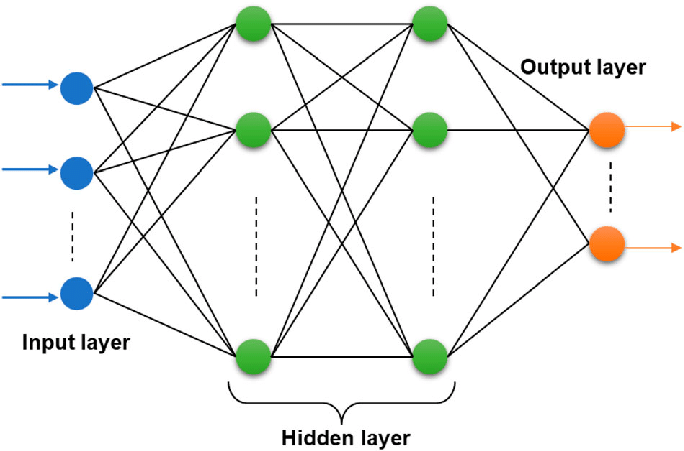

In [54]:
tf.random.set_seed(3) # to make code reproducible

In [55]:
# setting Layers

model_nn = keras.Sequential([ keras.layers.Flatten(input_shape = (30,)), # input layer--> Flatten will convert the data into a 1D array so each feature can be fed to a single Neuron; 30 is the no. of columns
                              keras.layers.Dense(20, activation = 'relu'),   # hidden layer ---> 20 is the no. of neurons required; relu= rectified linear units
                              keras.layers.Dense(2, activation = 'sigmoid')  # output layer ---> 2 is the no. of neuron,this should be equal to the no. of classes we have; sigmoid is similar to logistic regression
])

In [56]:
# compiling the Neural Network

model_nn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Here, we have only two class so we can do 0 and 1. In this case we will use loss= sparse_categorical_crossentropy.

But In case we have multiple labels, we will do one-hot encoding:<br>
dog = [1,0,0] <br>
cat = [0,1,0] <br>
horse = [0,0,1] <br>

In this type of cases we will do loss= categorical_crossentropy. <br>

In [57]:
# training the Neural Network

history = model_nn.fit(X_train, Y_train, validation_split = 0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 20ms/step - loss: 18.0160 - accuracy: 0.1980 - val_loss: 14.7742 - val_accuracy: 0.1087
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 12.2319 - accuracy: 0.2347 - val_loss: 9.4646 - val_accuracy: 0.1522
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 7.5605 - accuracy: 0.3570 - val_loss: 5.2405 - val_accuracy: 0.3043
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 3.9352 - accuracy: 0.5379 - val_loss: 2.7045 - val_accuracy: 0.5435
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 1.9631 - accuracy: 0.6626 - val_loss: 1.6387 - val_accuracy: 0.7826
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 1.0487 - accuracy: 0.7873 - val_loss: 0.5580 - val_accuracy: 0.8478
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.7165 - accuracy: 0.8240 - val_loss: 0.3250 - val_accuracy: 0.8913
Epoch 8/10
13/13

Low accuracy since the data is not standartise

Standartize the data

In [58]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # do not fit to the test data, only transform it



Train Neural Network with scaled data


In [59]:
history = model_nn.fit(X_train_scaled, Y_train, validation_split = 0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 17ms/step - loss: 0.8041 - accuracy: 0.4572 - val_loss: 0.5603 - val_accuracy: 0.7174
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.4564 - accuracy: 0.7971 - val_loss: 0.3210 - val_accuracy: 0.8913
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.3197 - accuracy: 0.8826 - val_loss: 0.2379 - val_accuracy: 0.9348
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2583 - accuracy: 0.9095 - val_loss: 0.1978 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2186 - accuracy: 0.9267 - val_loss: 0.1742 - val_accuracy: 0.9565
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1924 - accuracy: 0.9315 - val_loss: 0.1573 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1734 - accuracy: 0.9413 - val_loss: 0.1438 - val_accuracy: 0.9565
Epoch 8/10
13/13 [=

The accuracy improves significatly. <br>
Loss fuction (difference between true value and predicted value) also decreases.

Visualizing accuracy and loss

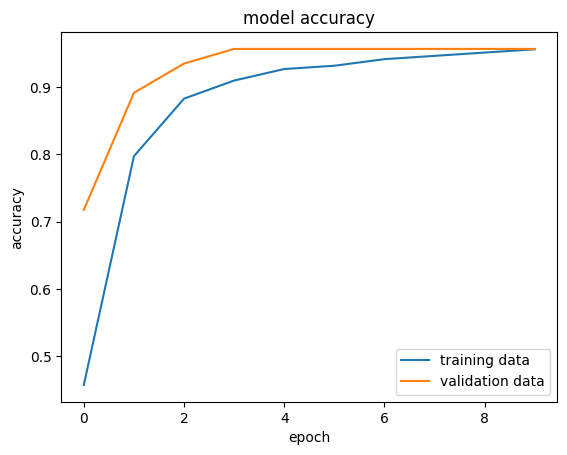

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

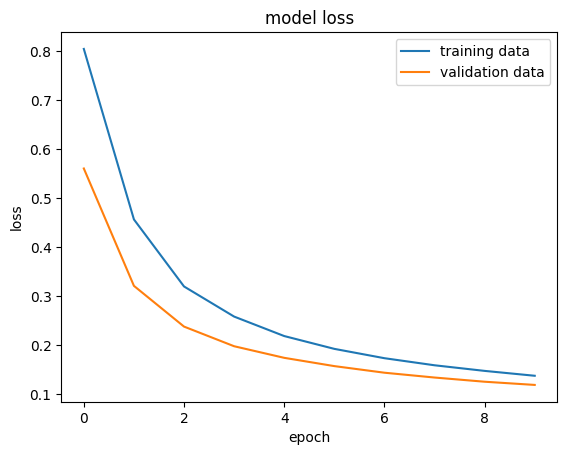

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

Accuracy of the model on test data

In [63]:
loss, accuracy = model_nn.evaluate(X_test_scaled, Y_test)
print(accuracy)

4/4 [==============================] - 0s 14ms/step - loss: 0.1623 - accuracy: 0.9737
0.9736841917037964


**Predictive Model using Neural Network**

In [64]:
Y_pred = model_nn.predict(X_test_scaled)

4/4 [==============================] - 0s 4ms/step


In [65]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.17467935 0.25642735]


This represents what is the probability of the value is 0 or 1, i.e., 0.17467935 represents the probability of the value is 0, and  0.25642735 represents the probability of value is 1. <br>


In other words, the model is 17% sure that a particular data point represents Malignant data and 25% sure that the data point represents Begnine data. It choses the maximum value as 1 and the other as 0.

In [66]:
print(X_test_scaled)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [67]:
print(Y_pred)

[[1.74679354e-01 2.56427348e-01]
 [3.87362778e-01 4.63586807e-01]
 [1.09651320e-01 8.97935092e-01]
 [9.74862337e-01 8.94034980e-04]
 [3.33741724e-01 4.39196914e-01]
 [8.38079929e-01 2.05763727e-02]
 [2.55434364e-01 5.91257155e-01]
 [4.66647819e-02 8.10495615e-01]
 [8.44456404e-02 8.20933044e-01]
 [7.76092559e-02 7.19690204e-01]
 [5.02438068e-01 5.59204996e-01]
 [2.00728402e-01 8.01645458e-01]
 [1.37459144e-01 5.13268948e-01]
 [1.76267684e-01 6.49351358e-01]
 [7.44693428e-02 8.09590816e-01]
 [7.06852794e-01 1.57829911e-01]
 [7.38613456e-02 9.03550625e-01]
 [6.79744557e-02 7.62677491e-01]
 [4.77319360e-02 6.64967120e-01]
 [7.22909212e-01 2.83157993e-02]
 [7.05696584e-05 1.00297453e-02]
 [5.93694374e-02 8.17934155e-01]
 [1.15962841e-01 8.95551980e-01]
 [5.39294742e-02 7.94170856e-01]
 [1.71689495e-01 4.43893045e-01]
 [6.82443917e-01 8.82930458e-02]
 [1.35678947e-01 6.31526828e-01]
 [2.24177286e-01 3.42023790e-01]
 [3.62791240e-01 2.41330907e-01]
 [7.25614190e-01 1.62150100e-01]
 [1.131228

model.predict() gives the prediction probability of each class for that data point.

It will choose the maximum vaue as 1. That is, suppose [1, 3] here the second value is maximum so we get a o/p 1. [5, 3] here the first value is maximum so we get output 0.

In [ ]:
# understanding argmax function

# my_list = [0.25, 0.56, 1]
# my_list1 = [10,5]
# index_of_max_value = np.argmax(my_list1)
# #print(my_list)
# print(my_list1)
# print(index_of_max_value)

In [71]:
# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


**Building the predictive system**

In [92]:
# Select the 3rd row (index 2) and exclude columns 'id', 'diagnosis', and 'Unnamed: 32'
#input_row = breast_cancer_data.iloc[1][breast_cancer_data.columns.difference(['id', 'diagnosis', 'Unnamed: 32'])]
input_row= selected_row = breast_cancer_data.iloc[20]

# Convert the selected row to a tuple
selected_row_tuple = tuple(input_row)

# Eliminate the first two elements and the last element
filtered_tuple = selected_row_tuple[2:-1]

print(filtered_tuple)

(13.08, 15.71, 85.63, 520.0, 0.1075, 0.127, 0.04568, 0.0311, 0.1967, 0.06811, 0.1852, 0.7477, 1.383, 14.67, 0.004097, 0.01898, 0.01698, 0.00649, 0.01678, 0.002425, 14.5, 20.49, 96.09, 630.5, 0.1312, 0.2776, 0.189, 0.07283, 0.3184, 0.08183)


In [93]:
#input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)
input_data_nn = filtered_tuple

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data_nn)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model_nn.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 [==============================] - 0s 23ms/step
[[0.13185214 0.64157546]]
[1]
The tumor is Benign
